# EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('personality_dataset.csv')

#Exploring the dataset

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# Checking for class BALANCE IN BINARY VARIABLES

In [14]:
for column in df.columns:
    if len(df[column].value_counts()) < 3:
      print(f'{column}')
      print(df[column].value_counts())
      print('---------------------------------')
    else: pass

Stage_fear
Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64
---------------------------------
Drained_after_socializing
Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64
---------------------------------
Personality
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64
---------------------------------


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#For numerical Features

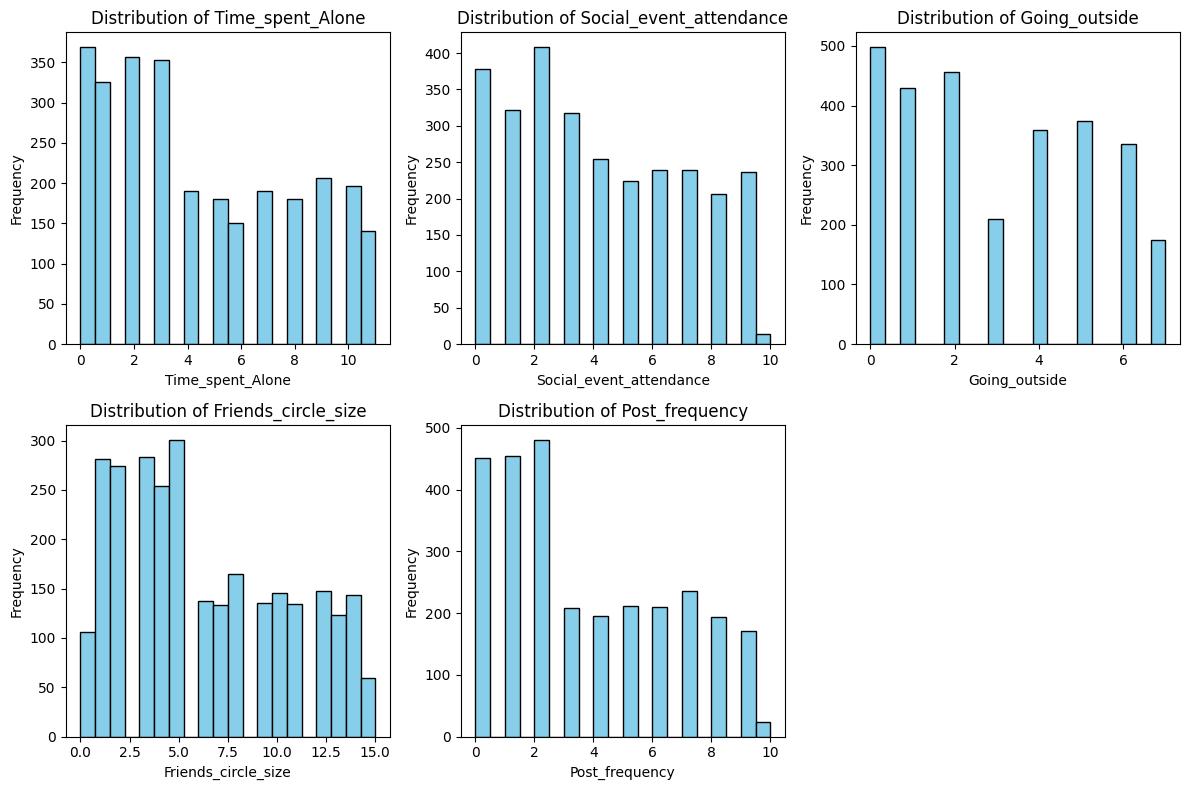

In [19]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# all columns seems skewed except going outsite so for any missing values if there are any well use median !

## Checking for missing values

In [20]:
for column in df.columns:
    print(f'Missing values in {column}')
    print(df[column].isnull().sum())

Missing values in Time_spent_Alone
63
Missing values in Stage_fear
73
Missing values in Social_event_attendance
62
Missing values in Going_outside
66
Missing values in Drained_after_socializing
52
Missing values in Friends_circle_size
77
Missing values in Post_frequency
65
Missing values in Personality
0


In [23]:
print(f' about {round((70/2900)*100)}% data is missing in each column')

 about 2% data is missing in each column


# let's make it 0%

In [27]:
for col in df.columns:
    if df[col].isnull().any():
      if df[col].dtype == 'object':
          df[col].fillna(df[col].mode()[0], inplace=True)
      else:
        df[col].fillna(df[col].median(),inplace=True)

<ipython-input-27-1044486976>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
<ipython-input-27-1044486976>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [28]:
for column in df.columns:
    print(f'Missing values in {column}')
    print(df[column].isnull().sum())

Missing values in Time_spent_Alone
0
Missing values in Stage_fear
0
Missing values in Social_event_attendance
0
Missing values in Going_outside
0
Missing values in Drained_after_socializing
0
Missing values in Friends_circle_size
0
Missing values in Post_frequency
0
Missing values in Personality
0


##Let's check for duplicates

In [32]:
df.duplicated().sum()

np.int64(448)

In [33]:
df.drop_duplicates(inplace=True)

#Outliers

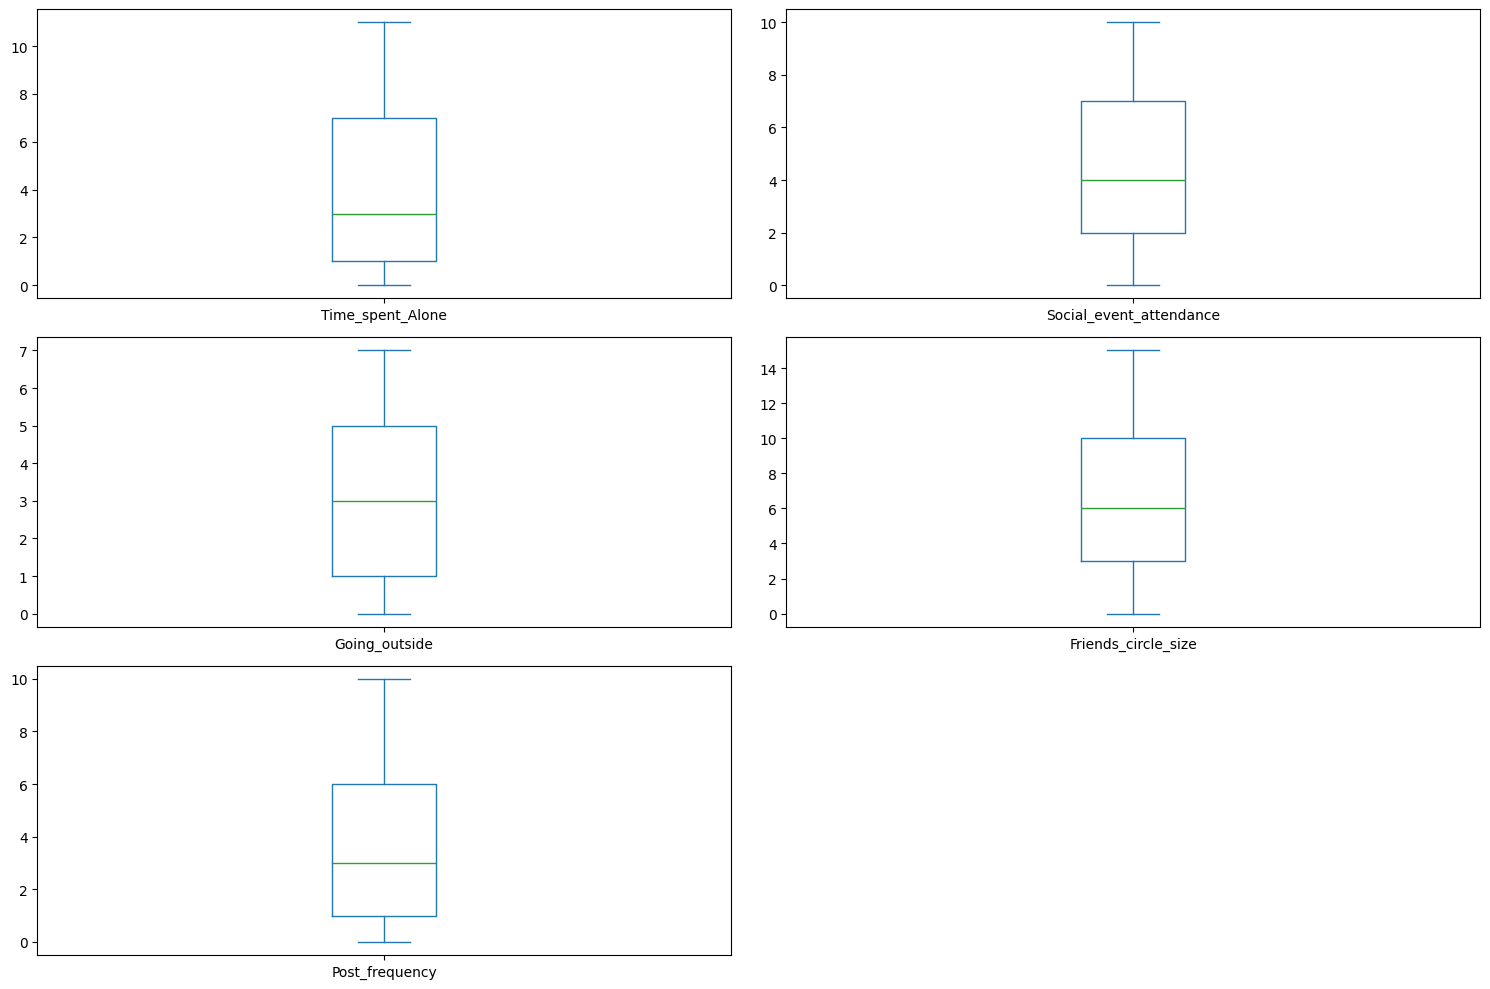

In [34]:
import matplotlib.pyplot as plt

# Plot boxplot for the whole DataFrame
df.plot(kind='box', subplots=True, layout=(int(len(df.columns)**0.5)+1, -1), figsize=(15, 10), sharex=False, sharey=False)

plt.tight_layout()
plt.show()

No outliers detected !

# one-hot encoding for categorical variables

In [35]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [37]:
cat_columns = ['Stage_fear','Drained_after_socializing','Personality']

df_encoded = pd.get_dummies(df,columns=cat_columns, drop_first=True)

df_encoded.shape

(2452, 8)

In [38]:
df_encoded.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert
0,4.0,4.0,6.0,13.0,5.0,False,False,False
1,9.0,0.0,0.0,0.0,3.0,True,True,True
2,9.0,1.0,2.0,5.0,2.0,True,True,True
3,0.0,6.0,7.0,14.0,8.0,False,False,False
4,3.0,9.0,4.0,8.0,5.0,False,False,False


In [43]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [44]:
#Shapiro wilk & Levene's test
#hypothesis testing to see how inputs are correlated with output
#post frew-- personality ---annova
#Drained_after_socializing  + personality----chi square
#stage fear + perosanlity---chia square

# let's check for normality and homoscedasity

In [47]:
from scipy.stats import shapiro

In [57]:
col = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
for x in col:
  stat, p = shapiro(df[x])
  if p > 0.05:
    print(f'{x} is normaly distributed P = {p}')
  else:
    print(f'{x} is not normaly distributed P = {p}')


Time_spent_Alone is not normaly distributed P = 1.598340018960246e-36
Social_event_attendance is not normaly distributed P = 2.9827441258051622e-31
Going_outside is not normaly distributed P = 5.7617562623303925e-33
Friends_circle_size is not normaly distributed P = 1.4719300080556117e-29
Post_frequency is not normaly distributed P = 7.459229371951786e-34


since our P values are very small we can't use T-test or ANOVA

LET'S CHECK FOR  HOMOSCEDASTICITY / EQUAL VARIANCE

In [58]:
from scipy.stats import levene

col = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']

for x in col:
  group1 = df_encoded[df_encoded['Personality'] == 'Extrovert'][x]
  group2 = df_encoded[df_encoded['Personality'] == 'Introvert'][x]

  stat, p = levene(group1, group2)
  if p > 0.05:
      print(f"{x} has equal variances (use standard t-test) P = {p} ")
  else:
      print(f" {x} has unequal variances (use Welch's t-test) P = {p}")

 Time_spent_Alone has unequal variances (use Welch's t-test) P = 6.814676241044626e-34
 Social_event_attendance has unequal variances (use Welch's t-test) P = 1.270855226509949e-21
 Going_outside has unequal variances (use Welch's t-test) P = 3.815183706884886e-06
 Friends_circle_size has unequal variances (use Welch's t-test) P = 2.0529783172849546e-35
 Post_frequency has unequal variances (use Welch's t-test) P = 6.2510709374175054e-52


Since our data is not normal neither it has Equal variance we should do non-perametric hypothesis testing !!

In [61]:
from scipy.stats import mannwhitneyu
col = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']

for x in col:
  group1 = df[df['Personality'] == 'Extrovert'][x]
  group2 = df[df['Personality'] == 'Introvert'][x]

  stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
  print(f"{x} --->P-value: {p}")

Time_spent_Alone --->P-value: 8.73575642023728e-267
Social_event_attendance --->P-value: 6.300709256009768e-270
Going_outside --->P-value: 2.7558403979072317e-268
Friends_circle_size --->P-value: 1.2161178276529598e-252
Post_frequency --->P-value: 6.491779412282114e-275


🔍 Your Mann-Whitney U Test Results:
You tested whether each numeric feature differs significantly between Introverts and Extroverts.

Feature	P-value	Interpretation
Time_spent_Alone	8.73e-267	✅ Significantly different
Social_event_attendance	6.30e-270	✅ Significantly different
Going_outside	2.75e-268	✅ Significantly different
Friends_circle_size	1.22e-252	✅ Significantly different
Post_frequency	6.49e-275	✅ Significantly different

✅ Interpretation:
All your p-values are extremely small → way below 0.05.
This tells you:

These numerical features are strongly associated with Personality.
That means: Extroverts and Introverts differ significantly across these variables.

## now for categorical variables

 Interpretation:
If p < 0.05: the feature is significantly associated with Personality → likely a good predictor.

If p ≥ 0.05: no significant relationship → possibly weak predictor.



In [62]:
from scipy.stats import chi2_contingency

# Feature 1: Stage_fear vs Personality
contingency1 = pd.crosstab(df['Stage_fear'], df['Personality'])
chi2_1, p1, _, _ = chi2_contingency(contingency1)
print("Stage_fear vs Personality --> P-value:", p1)

# Feature 2: Drained_after_socializing vs Personality
contingency2 = pd.crosstab(df['Drained_after_socializing'], df['Personality'])
chi2_2, p2, _, _ = chi2_contingency(contingency2)
print("Drained_after_socializing vs Personality --> P-value:", p2)

Stage_fear vs Personality --> P-value: 0.0
Drained_after_socializing vs Personality --> P-value: 0.0


In [63]:
print(pd.crosstab(df['Stage_fear'], df['Personality'], margins=True))

Personality  Extrovert  Introvert   All
Stage_fear                             
No                1290        109  1399
Yes                105        948  1053
All               1395       1057  2452


What This Shows:
Among those with Stage_fear = No:
✅ Most are Extroverts (1290 out of 1399 → ~92%)

Among those with Stage_fear = Yes:
✅ Most are Introverts (948 out of 1053 → ~90%)

This is a very strong association between Stage_fear and Personality.

People without stage fear tend to be Extroverts.

People with stage fear tend to be Introverts.

That’s why the Chi-Square test gives a p-value of 0.0 — this pattern is statistically very significant.

In [64]:
df_encoded.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert
0,4.0,4.0,6.0,13.0,5.0,False,False,False
1,9.0,0.0,0.0,0.0,3.0,True,True,True
2,9.0,1.0,2.0,5.0,2.0,True,True,True
3,0.0,6.0,7.0,14.0,8.0,False,False,False
4,3.0,9.0,4.0,8.0,5.0,False,False,False


In [65]:
features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency', 'Personality_Introvert']

correlation_matrix = df_encoded[features].corr()

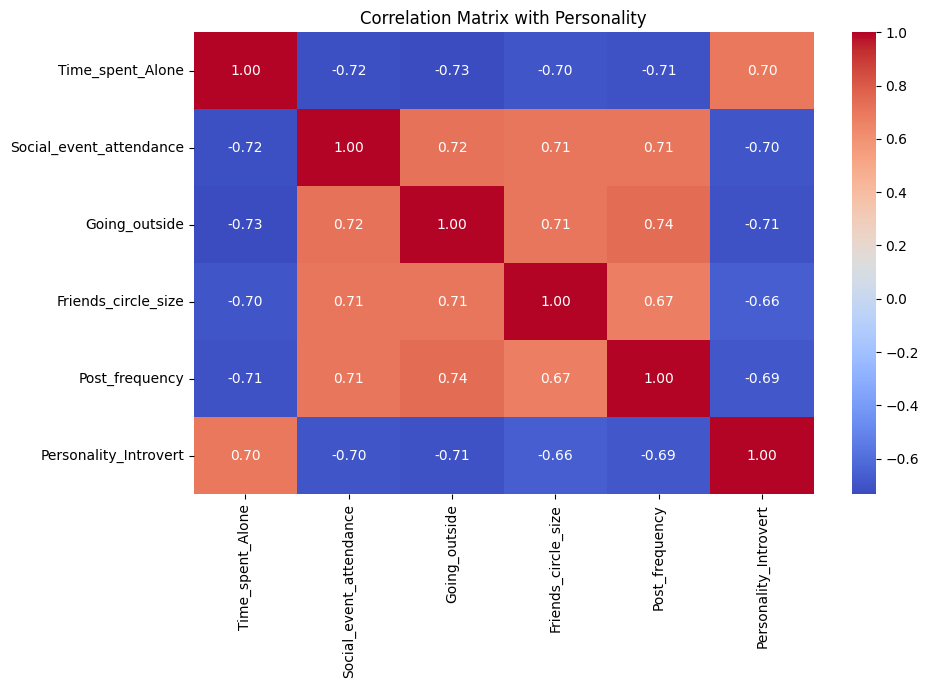

In [66]:

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Personality")
plt.show()

Correlation values range from -1 to 1

Focus on the last row/column: Personality_numeric

A value close to:

+1 → strong positive correlation (higher value = more likely extrovert)

-1 → strong negative correlation (higher value = more likely introvert)

0 → no linear relationship



#Feature engneering

our hypothesis testing concluded that almost all the features shows strong ascociation with target variables so there is no need for feature engineering but as per  assignment requirment we have to do it.

In [67]:
# Create polynomial features
import numpy as np
df_encoded['Post_frequency_log'] = np.log1p(df['Post_frequency'])
df_encoded['Time_Spent_Alone_Squared'] = df_encoded['Time_spent_Alone']**2
df_encoded['Post_Frequency_Cubed'] = df_encoded['Post_frequency']**3

In [68]:
# Create interaction terms
df_encoded['Social_Alone_Interaction'] = df_encoded['Social_event_attendance'] * df_encoded['Time_spent_Alone']
df_encoded['GoingOut_Friends_Interaction'] = df_encoded['Going_outside'] * df_encoded['Friends_circle_size']
df_encoded['Social_energy_gap'] = df_encoded['Friends_circle_size'] - df_encoded['Time_spent_Alone']
df_encoded['Activity_level'] = df_encoded['Social_event_attendance'] + df_encoded['Going_outside']

In [69]:
# Evaluate the impact of new features (example using correlation)
correlation_with_target = df_encoded.corr()['Personality_Introvert'].abs().sort_values(ascending=False)
print(correlation_with_target)


Personality_Introvert            1.000000
Stage_fear_Yes                   0.821991
Drained_after_socializing_Yes    0.820291
Activity_level                   0.756005
Social_energy_gap                0.733370
Going_outside                    0.709168
Post_frequency_log               0.707128
Time_spent_Alone                 0.697855
Social_event_attendance          0.696299
Post_frequency                   0.690380
GoingOut_Friends_Interaction     0.670397
Friends_circle_size              0.660079
Time_Spent_Alone_Squared         0.626189
Post_Frequency_Cubed             0.505242
Social_Alone_Interaction         0.026945
Name: Personality_Introvert, dtype: float64


In [71]:
# let's Social_Alone_Interaction as it has low prediction power
df_encoded = df_encoded.drop('Social_Alone_Interaction' , axis=1)

Logistic Regression multicolinearity is gonna be issue for logreg
K-Nearest Neighbors it somewhat affects it
Decision Tree handles well
Random Foresthandles well



In [72]:
# checking for multicolinearity


In [74]:
df_encoded.corr().abs()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert,Post_frequency_log,Time_Spent_Alone_Squared,Post_Frequency_Cubed,GoingOut_Friends_Interaction,Social_energy_gap,Activity_level
Time_spent_Alone,1.000000,0.719880,0.734058,0.699631,0.710071,0.838025,0.836139,0.697855,0.728143,0.961288,0.515491,0.711706,0.902376,0.782016
Social_event_attendance,0.719880,1.000000,0.718977,0.705761,0.707829,0.820737,0.819676,0.696299,0.715193,0.659154,0.532366,0.712365,0.771504,0.945779
Going_outside,0.734058,0.718977,1.000000,0.708326,0.740174,0.844248,0.841677,0.709168,0.750461,0.664984,0.555551,0.882802,0.779863,0.905748
Friends_circle_size,0.699631,0.705761,0.708326,1.000000,0.670369,0.798500,0.793649,0.660079,0.688929,0.636027,0.483668,0.908681,0.939246,0.761381
Post_frequency,0.710071,0.707829,0.740174,0.670369,1.000000,0.809788,0.806681,0.690380,0.950567,0.647555,0.902137,0.704494,0.745446,0.777526
Stage_fear_Yes,0.838025,0.820737,0.844248,0.798500,0.809788,1.000000,0.948391,0.821991,0.827086,0.762383,0.593309,0.814512,0.884196,0.895011
Drained_after_socializing_Yes,0.836139,0.819676,0.841677,0.793649,0.806681,0.948391,1.000000,0.820291,0.822453,0.760328,0.592192,0.812308,0.880364,0.893163
Personality_Introvert,0.697855,0.696299,0.709168,0.660079,0.690380,0.821991,0.820291,1.000000,0.707128,0.626189,0.505242,0.670397,0.733370,0.756005
Post_frequency_log,0.728143,0.715193,0.750461,0.688929,0.950567,0.827086,0.822453,0.707128,1.000000,0.664087,0.746408,0.715860,0.765322,0.786823
Time_Spent_Alone_Squared,0.961288,0.659154,0.664984,0.636027,0.647555,0.762383,0.760328,0.626189,0.664087,1.000000,0.472014,0.646803,0.845416,0.712706


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_encoded.drop('Personality_Introvert', axis=1)

# Check datatypes
print(X.dtypes)

Time_spent_Alone                 float64
Social_event_attendance          float64
Going_outside                    float64
Friends_circle_size              float64
Post_frequency                   float64
Stage_fear_Yes                      bool
Drained_after_socializing_Yes       bool
Post_frequency_log               float64
Time_Spent_Alone_Squared         float64
Post_Frequency_Cubed             float64
GoingOut_Friends_Interaction     float64
Social_energy_gap                float64
Activity_level                   float64
dtype: object


In [80]:
X = X.select_dtypes(include=[np.number])  # only keep numeric columns

In [82]:
X = X.apply(pd.to_numeric)

In [83]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        features         VIF
0               Time_spent_Alone         inf
1        Social_event_attendance         inf
2                  Going_outside         inf
3            Friends_circle_size         inf
4                 Post_frequency  291.275241
5             Post_frequency_log  149.149311
6       Time_Spent_Alone_Squared   19.060928
7           Post_Frequency_Cubed   34.496597
8   GoingOut_Friends_Interaction   31.658410
9              Social_energy_gap         inf
10                Activity_level         inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature	VIF	Interpretation


Most core features (1–4)	inf	Perfect multicollinearity 🚨

Post_frequency_log	149+	Extremely high — redundant with original

Post_Frequency_Cubed	34+	High — likely a polynomial correlation

Time_Spent_Alone_Squared	19+	High — again, probably too similar to original

Others like Social_energy_gap, Activity_level	inf	Likely linear combinations of

other variables

# even before applying any algo we can conclude that logistic regression will not perform well as it is pron to multicolinearity :out of 14 ,10 features shows high multicolinearity

In [84]:
X = df_encoded.drop('Personality_Introvert', axis=1)
y = df_encoded['Personality_Introvert']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [88]:
# Verify the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1961, 13)
y_train shape: (1961,)
X_val shape: (245, 13)
y_val shape: (245,)
X_test shape: (246, 13)
y_test shape: (246,)


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
# Initialize classifiers with adjusted hyperparameters
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

# Train the models
logreg_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print(logreg_model)
print(knn_model)
print(dt_model)

LogisticRegression(max_iter=1000)
KNeighborsClassifier()
DecisionTreeClassifier()


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Predict on the test set
logreg_pred = logreg_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

logreg_metrics = evaluate_model(y_test, logreg_pred)
knn_metrics = evaluate_model(y_test, knn_pred)
dt_metrics = evaluate_model(y_test, dt_pred)

# Create a summary table
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
results = pd.DataFrame(
    [logreg_metrics, knn_metrics, dt_metrics],
    index=model_names,
    columns=metrics
)
display(results)

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.918699,0.900901,0.917431,0.909091,0.918570
KNN,0.910569,0.884956,0.917431,0.900901,0.911270
Decision Tree,0.849593,0.833333,0.825688,0.829493,0.847151


#Hyperperameter tunining

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'liblinear' supports l1
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5)
logreg_grid.fit(X_train, y_train)
optimized_logreg_model = logreg_grid.best_estimator_

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': range(1, 21),  # Test a range of neighbor values
    'metric': ['euclidean', 'manhattan']  # Explore distance metrics
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_grid.fit(X_train, y_train)
optimized_knn_model = knn_grid.best_estimator_

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': range(1, 11),  # Explore various tree depths
    'min_samples_split': [2, 5, 10],  # Adjust minimum samples for splitting
    'min_samples_leaf': [1, 2, 4],  # Adjust minimum samples per leaf
    'criterion': ['gini', 'entropy', 'log_loss']  # Explore different split criteria
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
dt_grid.fit(X_train, y_train)
optimized_dt_model = dt_grid.best_estimator_

print("Optimized Logistic Regression Model:", optimized_logreg_model)
print("Optimized KNN Model:", optimized_knn_model)
print("Optimized Decision Tree Model:", optimized_dt_model)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Optimized Logistic Regression Model: LogisticRegression(C=0.001, max_iter=1000, penalty='l1', solver='liblinear')
Optimized KNN Model: KNeighborsClassifier(metric='euclidean', n_neighbors=11)
Optimized Decision Tree Model: DecisionTreeClassifier(max_depth=3)


#Optimized Logistic Regression Model: LogisticRegression(C=0.001, max_iter=1000, penalty='l1', solver='liblinear')
#Optimized KNN Model: KNeighborsClassifier(metric='euclidean', n_neighbors=11)
#Optimized Decision Tree Model: DecisionTreeClassifier(max_depth=3)

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.926829,0.902655,0.93578,0.918919,0.918670
KNN,0.926829,0.902655,0.93578,0.918919,0.935981
Decision Tree,0.926829,0.902655,0.93578,0.918919,0.944418


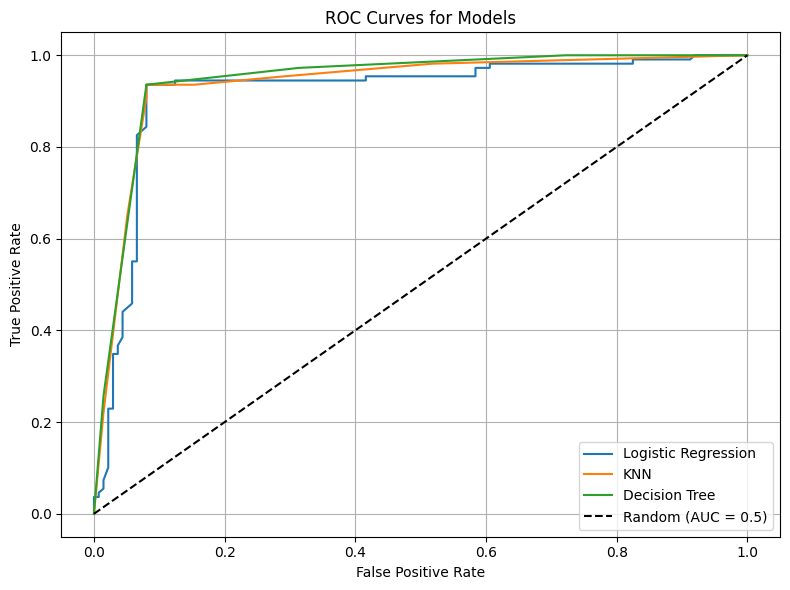

In [130]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Predict class probabilities for AUC-ROC
logreg_proba = optimized_logreg_model.predict_proba(X_test)[:, 1]
knn_proba = optimized_knn_model.predict_proba(X_test)[:, 1]
dt_proba = optimized_dt_model.predict_proba(X_test)[:, 1]

# Predict classes
logreg_pred = optimized_logreg_model.predict(X_test)
knn_pred = optimized_knn_model.predict(X_test)
dt_pred = optimized_dt_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    return accuracy, precision, recall, f1, roc_auc

# Calculate metrics
logreg_metrics = evaluate_model(y_test, logreg_pred, logreg_proba)
knn_metrics = evaluate_model(y_test, knn_pred, knn_proba)
dt_metrics = evaluate_model(y_test, dt_pred, dt_proba)

# Create summary table
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
results = pd.DataFrame(
    [logreg_metrics, knn_metrics, dt_metrics],
    index=model_names,
    columns=metrics
)
display(results)

# 🔽 Plot ROC Curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_proba)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier(random_state=42)

In [116]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
y_pred = rf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.91      0.91       137
        True       0.89      0.87      0.88       109

    accuracy                           0.89       246
   macro avg       0.89      0.89      0.89       246
weighted avg       0.89      0.89      0.89       246

Confusion Matrix:
 [[125  12]
 [ 14  95]]


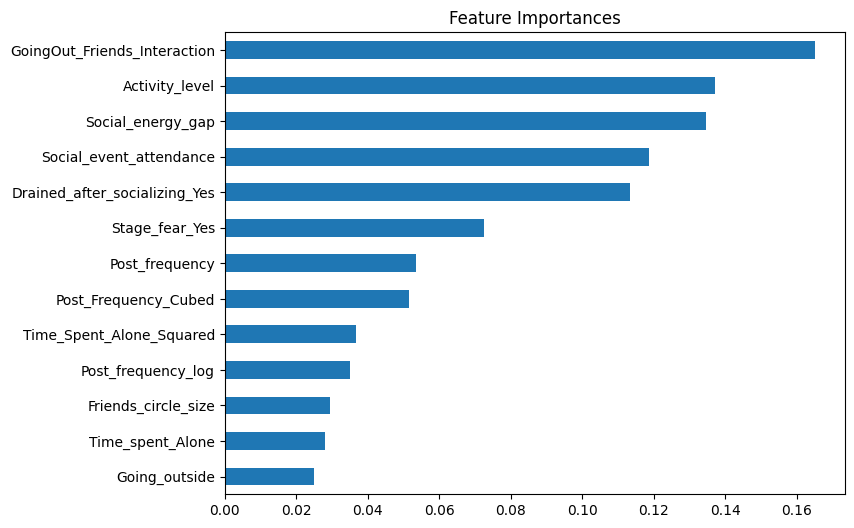

In [119]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances")
plt.show()

In [120]:
# hyper perameter tuning for random forest

In [121]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

In [122]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # or use f1, roc_auc, etc.
    n_jobs=-1,  # run in parallel
    verbose=2
)

In [123]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

#best_estimator_: RandomForestClassifier
RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [124]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.9240172404839798


In [125]:
from sklearn.metrics import classification_report

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.91      0.93       137
        True       0.89      0.94      0.91       109

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.91      0.93       137
        True       0.89      0.94      0.91       109

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246

ROC-AUC Score: 0.9493


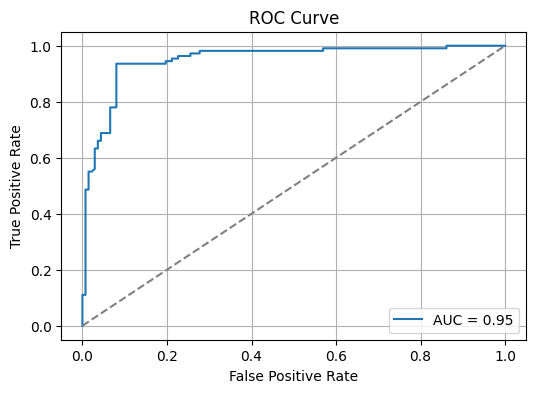

In [127]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred = best_rf.predict(X_test)

# Probabilities for AUC-ROC
y_proba = best_rf.predict_proba(X_test)[:, 1]  # probability for class 1

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optional: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

Promising ROC curve !

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.926829,0.902655,0.93578,0.918919,0.918670
KNN,0.926829,0.902655,0.93578,0.918919,0.935981
Decision Tree,0.926829,0.902655,0.93578,0.918919,0.944418
Random Forest,0.922764,0.894737,0.93578,0.914798,0.949340


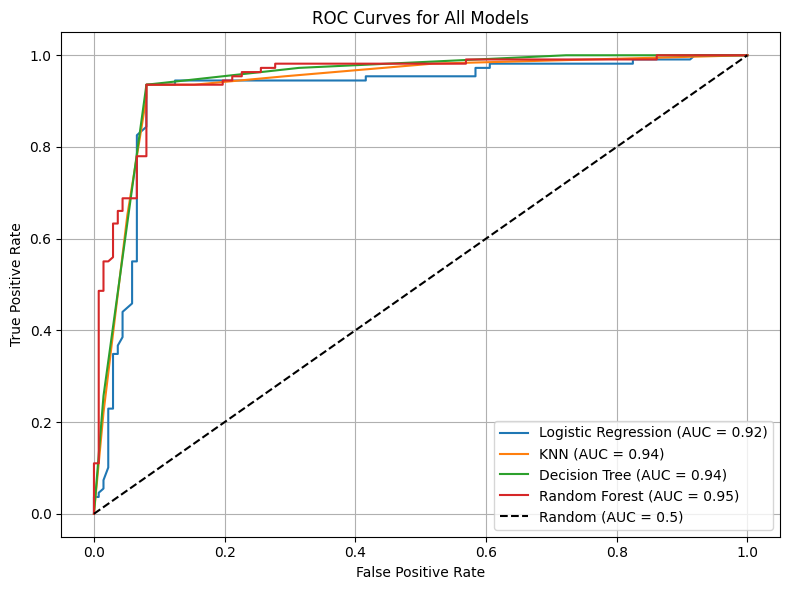

In [129]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report
)
import matplotlib.pyplot as plt
import pandas as pd

# Predict class probabilities for AUC-ROC
logreg_proba = optimized_logreg_model.predict_proba(X_test)[:, 1]
knn_proba = optimized_knn_model.predict_proba(X_test)[:, 1]
dt_proba = optimized_dt_model.predict_proba(X_test)[:, 1]
rf_proba = best_rf.predict_proba(X_test)[:, 1]

# Predict class labels
logreg_pred = optimized_logreg_model.predict(X_test)
knn_pred = optimized_knn_model.predict(X_test)
dt_pred = optimized_dt_model.predict(X_test)
rf_pred = best_rf.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)  # use proba for AUC
    return accuracy, precision, recall, f1, roc_auc

# Evaluate all models
logreg_metrics = evaluate_model(y_test, logreg_pred, logreg_proba)
knn_metrics = evaluate_model(y_test, knn_pred, knn_proba)
dt_metrics = evaluate_model(y_test, dt_pred, dt_proba)
rf_metrics = evaluate_model(y_test, rf_pred, rf_proba)

# Summary table
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
results = pd.DataFrame(
    [logreg_metrics, knn_metrics, dt_metrics, rf_metrics],
    index=model_names,
    columns=metrics
)
display(results)

# ROC Curve points
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_proba)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)

# AUC values
auc_logreg = roc_auc_score(y_test, logreg_proba)
auc_knn = roc_auc_score(y_test, knn_proba)
auc_dt = roc_auc_score(y_test, dt_proba)
auc_rf = roc_auc_score(y_test, rf_proba)

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
